# 电影评论分类：二分类问题

In [1]:
###### 1. 数据集 ###############################
###############################################
import tensorflow as tf
from tensorflow.keras.datasets import imdb

# 将 mnist.npz 和 imdb_word_index.json 文件下载到 ~/.keras/datasets 文件夹中
(train_data, train_labels), (test_data,
                             test_labels) = imdb.load_data(num_words=10000)

# num_words=10000, 仅保留数据集中1000个最常出现的单词

train_data.shape, test_data.shape

((25000,), (25000,))

In [2]:
# 训练数据
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [3]:
# 训练标签
train_labels[0]

1

In [4]:
# 原始文本

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key)
                           for (key, value) in word_index.items()])
decoded_review = ' '.join(
    reverse_word_index.get(i - 3, '?') for i in train_data[0])

decoded_review[:100]

"? this film was just brilliant casting location scenery story direction everyone's really suited the"

In [5]:
###### 2. 数据标准化 ############################
###############################################
import numpy as np


# one-hot 向量，
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return (results)


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_train.shape

(25000, 10000)

In [6]:
###### 3. 构建网络 #############################
###############################################
# 两个中间层，每层16个神经元，使用 relu 激活函数
# 第三层输出标量，预测结果，使用 sigmoid 激活函数

from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
###### 4. 训练模型 #############################
###############################################

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    verbose=2,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 - 1s - loss: 0.5171 - accuracy: 0.7896 - val_loss: 0.4010 - val_accuracy: 0.8671
Epoch 2/20
15000/15000 - 1s - loss: 0.3197 - accuracy: 0.9025 - val_loss: 0.3149 - val_accuracy: 0.8894
Epoch 3/20
15000/15000 - 1s - loss: 0.2330 - accuracy: 0.9266 - val_loss: 0.2940 - val_accuracy: 0.8842
Epoch 4/20
15000/15000 - 1s - loss: 0.1833 - accuracy: 0.9422 - val_loss: 0.2778 - val_accuracy: 0.8895
Epoch 5/20
15000/15000 - 1s - loss: 0.1476 - accuracy: 0.9550 - val_loss: 0.2780 - val_accuracy: 0.8890
Epoch 6/20
15000/15000 - 1s - loss: 0.1246 - accuracy: 0.9633 - val_loss: 0.2912 - val_accuracy: 0.8845
Epoch 7/20
15000/15000 - 1s - loss: 0.1026 - accuracy: 0.9706 - val_loss: 0.3067 - val_accuracy: 0.8852
Epoch 8/20
15000/15000 - 1s - loss: 0.0857 - accuracy: 0.9765 - val_loss: 0.3203 - val_accuracy: 0.8833
Epoch 9/20
15000/15000 - 1s - loss: 0.0706 - accuracy: 0.9819 - val_loss: 0.3427 - val_accuracy: 0.8797
Epoch 10/20
15

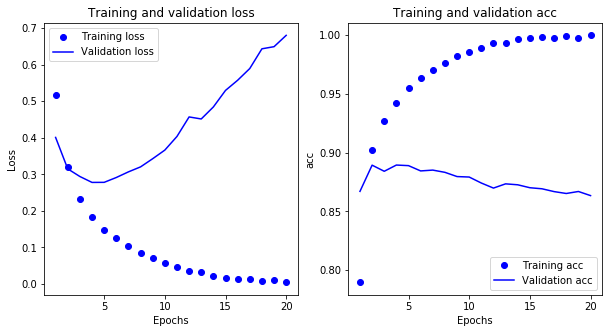

In [8]:
###### 5. 检查训练过程 ##########################
###############################################

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
f, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(epochs, loss, 'bo', label='Training loss')
axes[0].plot(epochs, val_loss, 'b', label='Validation loss')
axes[0].set_title('Training and validation loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(epochs, acc, 'bo', label='Training acc')
axes[1].plot(epochs, val_acc, 'b', label='Validation acc')
axes[1].set_title('Training and validation acc')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('acc')
axes[1].legend()

plt.show()

# 从图中可知，模型过拟合

# 新闻分类：多分类问题

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters

In [10]:
###### 1. 数据集 ###############################
###############################################
(train_data, train_labels), (test_data,
                             test_labels) = reuters.load_data(num_words=10000)

train_data.shape, train_labels.shape

((8982,), (8982,))

In [11]:
# 原始文本
word_index = reuters.get_word_index()
reversed_word_index = dict([(value, key)
                            for (key, value) in word_index.items()])
decoded_news = ' '.join(
    [reversed_word_index.get(i - 3, '?') for i in train_data[0]])

decoded_news

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [12]:
###### 2. 数据标准化 ############################
###############################################

# 每个文档转化成，词汇表大小的向量
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return (results)


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train.shape, x_test.shape

((8982, 10000), (2246, 10000))

In [13]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return (results)


# 标签 one-hot 向量
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

# 46 分类问题
one_hot_train_labels.shape

(8982, 46)

In [14]:
###### 3. 构建模型 #############################
###############################################
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
###### 4. 训练模型 ##############################
###############################################
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 82us/sample - loss: 2.6289 - accuracy: 0.4961 - val_loss: 1.7985 - val_accuracy: 0.6400
Epoch 2/20
7982/7982 [==============================] - 0s 33us/sample - loss: 1.4465 - accuracy: 0.6982 - val_loss: 1.3437 - val_accuracy: 0.6990
Epoch 3/20
7982/7982 [==============================] - 0s 33us/sample - loss: 1.0765 - accuracy: 0.7686 - val_loss: 1.1705 - val_accuracy: 0.7320
Epoch 4/20
7982/7982 [==============================] - 0s 33us/sample - loss: 0.8446 - accuracy: 0.8166 - val_loss: 1.0647 - val_accuracy: 0.7740
Epoch 5/20
7982/7982 [==============================] - 0s 32us/sample - loss: 0.6721 - accuracy: 0.8559 - val_loss: 0.9581 - val_accuracy: 0.8050
Epoch 6/20
7982/7982 [==============================] - 0s 33us/sample - loss: 0.5368 - accuracy: 0.8869 - val_loss: 0.9279 - val_accuracy: 0.8090
Epoch 7/20
7982/7982 [==============================] - 0s 33us/sample

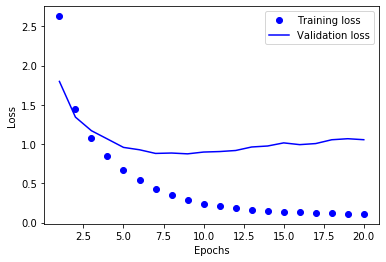

In [16]:
###### 5. 查看模型训练过程 #######################
###############################################
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

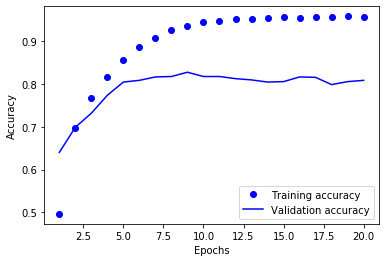

In [17]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

In [18]:
###### 6. 优化模型 #######################
###############################################
# 从上一步分析可知，模型在训练第9轮后开始过拟合，新模型共9个轮次

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 73us/sample - loss: 2.6269 - accuracy: 0.5356 - val_loss: 1.7016 - val_accuracy: 0.6590
Epoch 2/9
7982/7982 [==============================] - 0s 32us/sample - loss: 1.3993 - accuracy: 0.7196 - val_loss: 1.2797 - val_accuracy: 0.7290
Epoch 3/9
7982/7982 [==============================] - 0s 33us/sample - loss: 1.0312 - accuracy: 0.7830 - val_loss: 1.1086 - val_accuracy: 0.7680
Epoch 4/9
7982/7982 [==============================] - 0s 32us/sample - loss: 0.8004 - accuracy: 0.8305 - val_loss: 1.0102 - val_accuracy: 0.7860
Epoch 5/9
7982/7982 [==============================] - 0s 33us/sample - loss: 0.6353 - accuracy: 0.8659 - val_loss: 0.9234 - val_accuracy: 0.8060
Epoch 6/9
7982/7982 [==============================] - 0s 33us/sample - loss: 0.4989 - accuracy: 0.8981 - val_loss: 0.8800 - val_accuracy: 0.8120
Epoch 7/9
7982/7982 [==============================] - 0s 33us/sample - loss

In [19]:
###### 7. 验证模型 #######################
###############################################

results = model.evaluate(x_test, one_hot_test_labels, verbose=0)
results

[0.9690361220392922, 0.7907391]

In [20]:
###### 8. 模型进行预测 #######################
###############################################

predictions = model.predict(x_test)

# 模型输出为概率分布，最大索引得到预测标签
predictions[0]

array([1.0336036e-03, 4.8208452e-04, 1.9767179e-04, 7.5442469e-01,
       2.0559447e-01, 1.5529558e-04, 4.1876399e-05, 4.6892770e-04,
       7.6320474e-03, 4.0857031e-04, 6.3446542e-04, 3.7261362e-03,
       2.1986533e-03, 2.1254749e-04, 1.7935918e-04, 1.6657845e-04,
       5.0199302e-03, 2.4665252e-04, 1.5899650e-04, 2.7954245e-03,
       5.0903852e-03, 7.3358015e-04, 4.0157832e-04, 7.5854827e-05,
       4.9616920e-04, 3.3880264e-04, 7.5204829e-05, 1.2921463e-03,
       2.5830037e-04, 1.1150693e-03, 1.1767257e-03, 4.3231438e-04,
       1.2131906e-04, 1.3642397e-05, 1.1687732e-04, 2.0529654e-04,
       1.1658194e-03, 5.5969304e-05, 9.8755001e-05, 4.0920320e-04,
       1.4301970e-04, 1.9611442e-04, 4.7746053e-05, 7.0409485e-05,
       7.5586344e-05, 1.6051599e-05], dtype=float32)

In [21]:
# 模型输出为概率分布，最大概率的索引为 预测标签
np.argmax(predictions[0]), np.argmax(one_hot_test_labels[0])

(3, 3)

# 波士顿房价数据集：回归问题

In [22]:
###### 1. 数据集 ################################
###############################################

from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data,
                              test_targets) = boston_housing.load_data()

In [23]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [24]:
train_targets[:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

In [25]:
###### 2. 数据标准化 #############################
###############################################

# 数据标准化
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [26]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [27]:
###### 3. 构建模型 ###############################
###############################################
from tensorflow.keras import models
from tensorflow.keras import layers


def build_model():
    model = models.Sequential()
    model.add(
        layers.Dense(64,
                     activation='relu',
                     input_shape=(train_data.shape[1], )))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return (model)

In [28]:
###### 4. 训练模型 ###############################
###############################################

# 用K折验证法来训练模型

import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples:(i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples:(i + 1) * num_val_samples]

    partial_train_data = np.concatenate([
        train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]
    ],
                                        axis=0)
    partial_train_targets = np.concatenate([
        train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]
    ],
                                           axis=0)
    model = build_model()
    model.fit(partial_train_data,
              partial_train_targets,
              epochs=num_epochs,
              batch_size=1,
              verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [29]:
###### 5. 优化模型 ###############################
###############################################

predicted = model.predict(test_data)
predicted - test_targets

# 预测值与实际值之间的差别较大

array([[  1.33871632, -10.26128368, -10.46128368, ..., -41.46128368,
        -18.16128368, -16.46128368],
       [ 12.59985619,   0.99985619,   0.79985619, ..., -30.20014381,
         -6.90014381,  -5.20014381],
       [ 13.49619179,   1.89619179,   1.69619179, ..., -29.30380821,
         -6.00380821,  -4.30380821],
       ...,
       [ 44.98001938,  33.38001938,  33.18001938, ...,   2.18001938,
         25.48001938,  27.18001938],
       [ 23.71952133,  12.11952133,  11.91952133, ..., -19.08047867,
          4.21952133,   5.91952133],
       [ 15.86559753,   4.26559753,   4.06559753, ..., -26.93440247,
         -3.63440247,  -1.93440247]])

In [34]:
# 增加训练轮次
# 保存每折的验证结果

num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples:(i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples:(i + 1) * num_val_samples]

    partial_train_data = np.concatenate([
        train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]
    ],
                                        axis=0)
    partial_train_targets = np.concatenate([
        train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]
    ],
                                           axis=0)
    model = build_model()
    history = model.fit(partial_train_data,
                        partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs,
                        batch_size=1,
                        verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [36]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

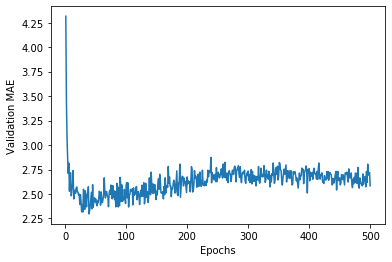

In [37]:
plt.clf()
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

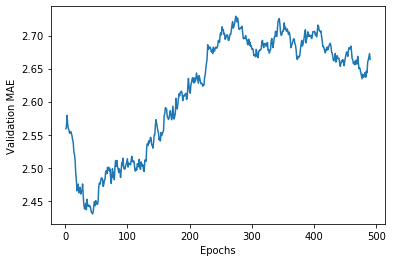

In [38]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points


smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets, epochs=50, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score

# 小结：
- 常见机器学习任务：二分类、多分类、标量回归
- 处理机器学习任务的基本流程